In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Oct  9 00:33:01 2022

@author: Tracy Zhou
"""

import os
p = "F:/Python/MyScript"
os.chdir(p)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import cluster

# fooddat = pd.read_csv("food.dat", sep = "\s+", header=None, index_col = 0)
bond = pd.read_csv("bond.csv", index_col = 0)
print(bond)




                   V1        V2        V3        V4        V5  V6  V7
158964 - 1  20.032854  7.367556  0.251333  0.632226   6.20000   0   7
150860 - 1   8.071184  1.322382  0.040027  0.836160   5.25000   0   6
193793 - 1  12.016427  9.015743  0.250854  0.249715   6.80000   0   9
155264 - 1  15.025325  3.030801  0.201348  0.798287   7.75000   0   8
106343 - 1  15.003422  3.003422  0.200182  0.799818   7.70000   0   6
173784 - 1  24.969199  8.969199  0.199013  0.640789   6.00000   0   6
182703 - 1   5.048597  0.802190  0.158894  0.841106   2.85000   0   2
398230 - 1  10.004107  0.755647  0.025178  0.924466   8.15000   0   6
106994 - 1  15.044490  1.045859  0.069518  0.930482   8.00000   0   1
138585 - 1  10.012320  2.012320  0.200984  0.799016   7.10000   0   6
581893 - 0  10.028747  4.750171  0.301938  0.526345   5.87500   2   9
109679 - 0   9.820671  9.820671  0.288542  0.000000   5.00000   2  15
143159 - 0   6.395619  6.395619  0.374572  0.000000  10.00000  10  13
132797 - 0  29.76043

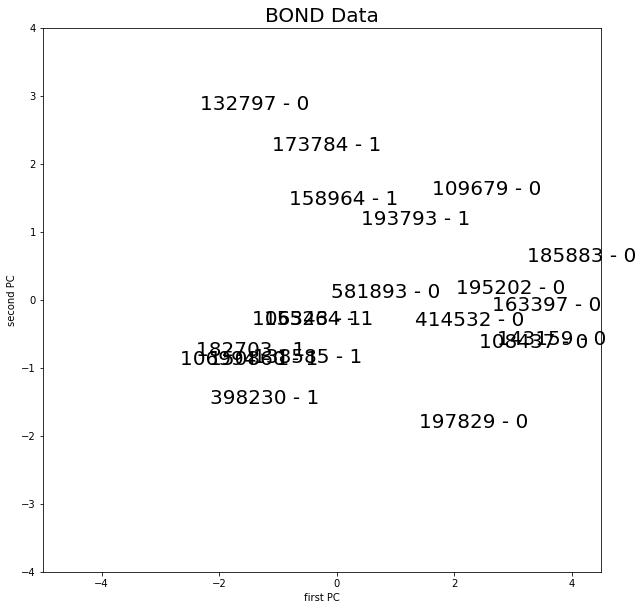

In [5]:
f = (bond - bond.mean())/bond.std()

mean = f.mean()
m = np.tile(mean, (len(f), 1))
x = f - m

eva = np.linalg.eig(np.cov(x.T))[0]
eve = np.linalg.eig(np.cov(x.T))[1]

y = x @ eve
ym = y.iloc[:, :2]

# Plot 1: PCA

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(-ym[0], ym[1], c = "w")
for i in range(0, len(ym)):
    ax.text(-ym.iloc[i,0], ym.iloc[i,1], x.index[i], fontsize = 20)
ax.set_xlabel("first PC")
ax.set_ylabel("second PC")
ax.set_ylim(-4, 4)
ax.set_xlim(-5, 4.5)
ax.set_title("BOND Data", fontsize = 20)
plt.savefig("plot_Bond_Data.png", transparent=True)
plt.show()




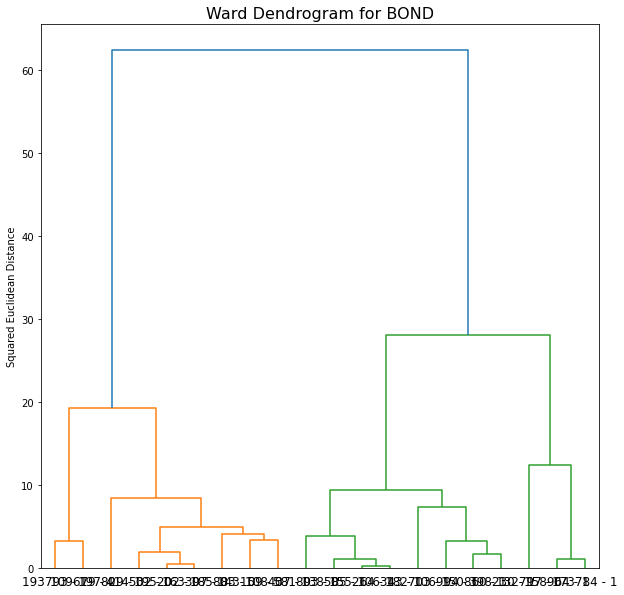

In [6]:
d = np.zeros([len(f),len(f)])

for i in range(0, len(f)):
    for j in range(0, len(f)):
        d[i, j] = np.linalg.norm(f.iloc[i, :] - f.iloc[j, :])

dd = (d**2)

ddd  = dd[1:, :-1][:, 0]
for i in range(1, len(f)-1):
    ddd = np.concatenate((ddd, dd[1:, :-1][i:, i]))
    
w = cluster.hierarchy.linkage(ddd, 'ward')

# Plot 2: Dendrogram for the standardized food.dat after Ward algorithm

fig, ax = plt.subplots(figsize = (10, 10))
h = cluster.hierarchy.dendrogram(w, labels=x.index)
plt.title("Ward Dendrogram for BOND", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")
plt.savefig("plot_Bond_WardD.png", transparent=True)
plt.show()




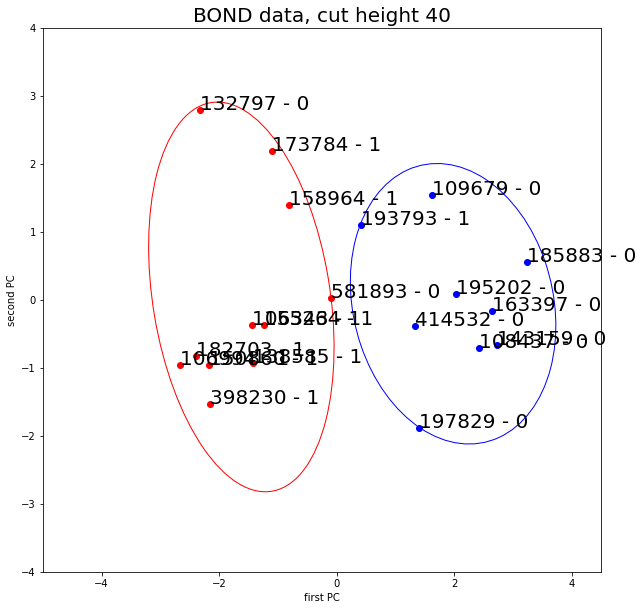

In [42]:
groups = cluster.hierarchy.cut_tree(w, height=40)

merg = np.concatenate((ym, groups), axis = 1)

merg = pd.DataFrame(merg).sort_values(by = 2)

merg1 = merg.iloc[:len(merg[merg.iloc[:, 2] == 0]), :2]
merg2 = merg.iloc[len(merg[merg.iloc[:, 2] == 0]):, :2]

covm = np.cov(merg1.iloc[:, 0], merg1.iloc[:, 1])
covm1 = np.cov(merg2.iloc[:, 0], merg2.iloc[:, 1])

eigva = np.sqrt(np.linalg.eig(covm)[0])
eigve = np.linalg.eig(covm)[1]
eigva1 = np.sqrt(np.linalg.eig(covm1)[0])
eigve1 = np.linalg.eig(covm1)[1]

fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(-ym[0], ym[1], c = "w")
for i in range(0, len(ym)):
    ax.text(-ym.iloc[i,0], ym.iloc[i,1], x.index[i], fontsize = 20)

ax.add_patch(Ellipse(xy = (np.mean(-merg1.iloc[:, 0]), np.mean(merg1.iloc[:, 1])),
                     width = eigva[0]*4, height = eigva[1]*4,
                     angle = -np.rad2deg(np.arccos(eigve[0, 0])), 
                     edgecolor = "r", zorder = 0, fill = False))

ax.add_patch(Ellipse(xy = (np.mean(-merg2.iloc[:, 0]), np.mean(merg2.iloc[:, 1])),
                     width = eigva1[0]*4, height = eigva1[1]*4,
                     angle = -np.rad2deg(np.arccos(eigve1[0, 0])), 
                     edgecolor = "b", zorder = 0, fill = False))

ax.scatter(-merg1.iloc[:, 0], merg1.iloc[:, 1], c = "r")
ax.scatter(-merg2.iloc[:, 0], merg2.iloc[:, 1], c = "b")

ax.set_xlabel("first PC")
ax.set_ylabel("second PC")
ax.set_ylim(-4, 4)
ax.set_xlim(-5, 4.5)
ax.set_title("BOND data, cut height 40", fontsize = 20)
plt.savefig("plot_Bond_PCA.png", transparent=True)
plt.show()

